/home/yasir/miniconda3/envs/openai/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Starting the enhanced approach 3 implementation...
Enhanced Approach 3: Adding features to handle early-to-IPO valuation jumps

Loading and preparing dataset...
Dataset shape: (295, 175)
Number of unique companies: 110
Target variable: Post Valuation

1. Preparing data for machine learning...
Selected 20 features for modeling:
['Deal Size', 'Pre-money Valuation', 'Revenue', 'EBITDA', 'Net Income', 'Gross Profit', 'Employees', '# Investors', '# New Investors', '# Follow-on Investors', 'Raised to Date', 'Total Invested Equity', 'Primary Industry Sector', 'Primary Industry Group', 'Current Business Status', 'Current Financing Status', 'Year Founded', 'Deal Type', 'VC Round', 'Financing Status']

Rows with valid target: 295 (out of 295 total rows)

2. Feature Engineering - Adding new features to handle valuation jumps...
- Adding funding round maturity indicators...
- Adding time-based features...
- Adding growth rate features between funding rounds...
- Adding growth rate features between

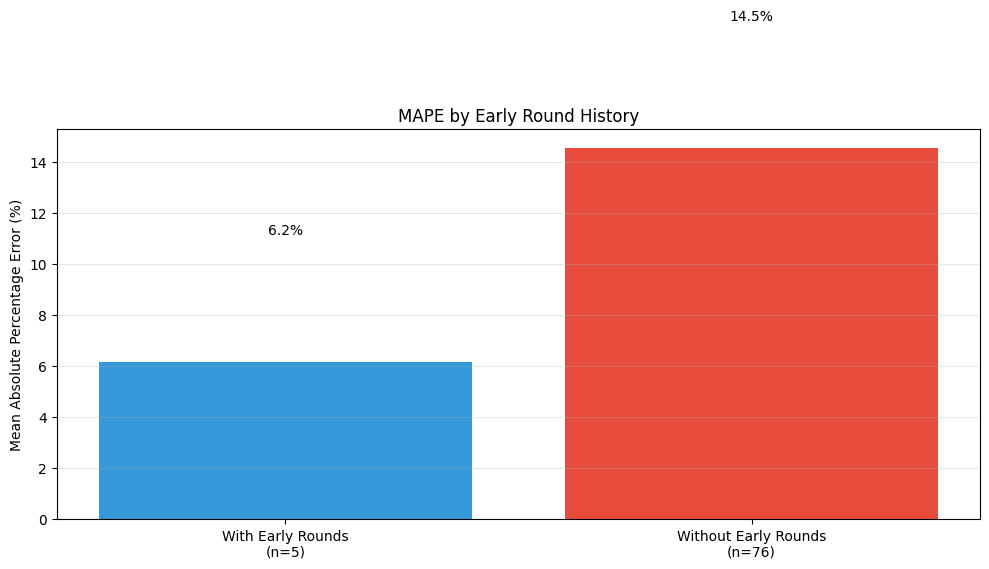

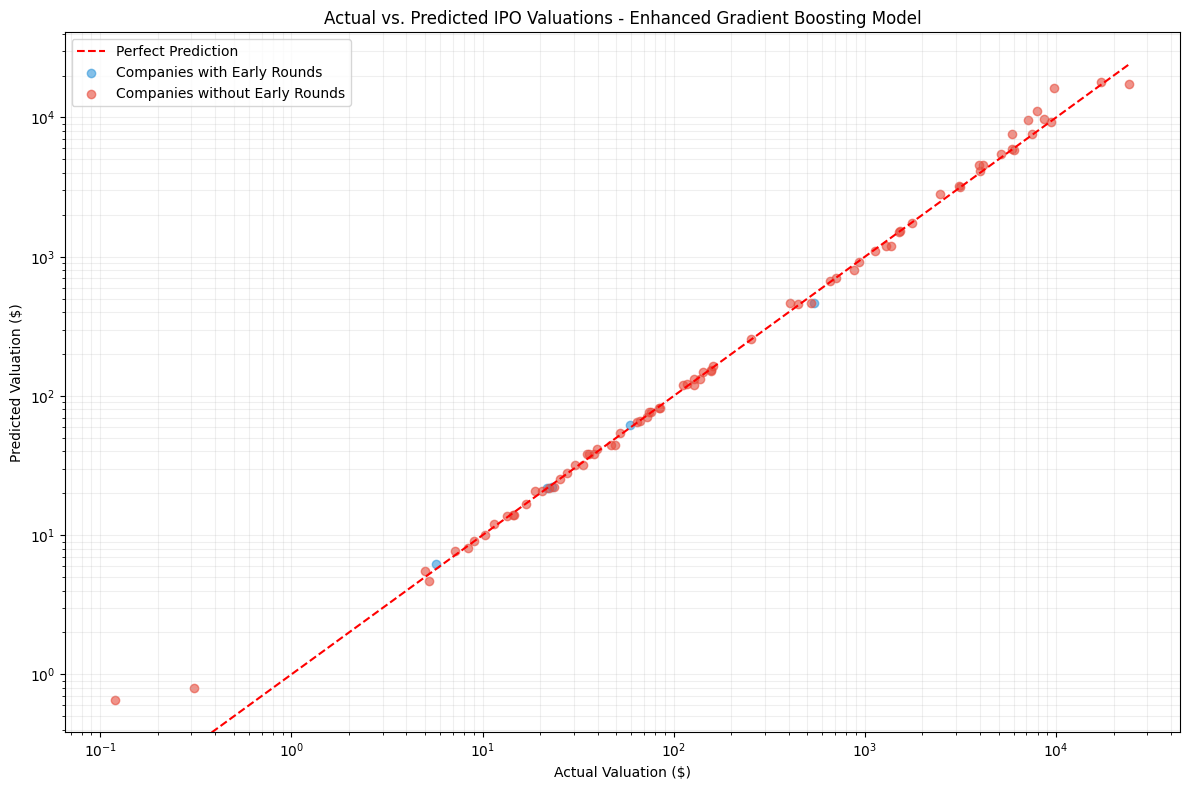


6. Analyzing feature importance...

Top 20 most important features:
      Feature  Importance
2310  x59 x60    0.962151
925   x14 x25    0.031191
1028  x16 x25    0.002355
362    x4 x37    0.000737
1077  x17 x24    0.000556
71      x0 x4    0.000506
384    x4 x59    0.000472
1220  x20 x23    0.000303
1174  x19 x24    0.000268
1062  x16 x59    0.000202
1125  x18 x23    0.000186
153    x1 x20    0.000181
1075  x17 x22    0.000088
2198  x50 x56    0.000076
491    x6 x43    0.000074
258    x2 x60    0.000069
2149  x47 x61    0.000066
1126  x18 x24    0.000064
282    x3 x20    0.000048
1743  x32 x60    0.000047

New features among top 20: 0


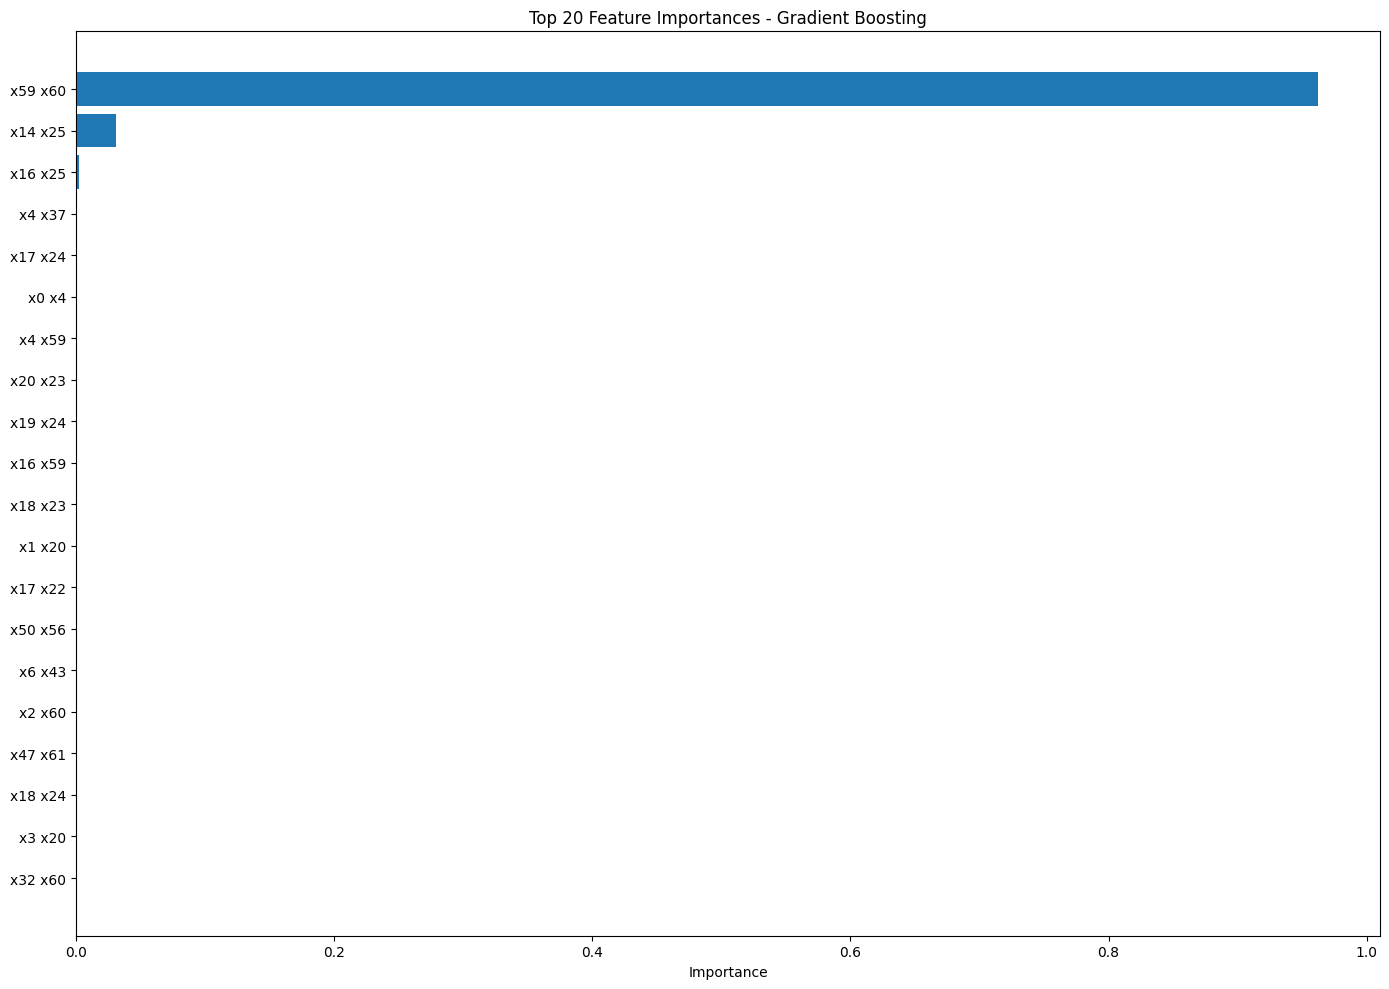


7. Saving the enhanced model...

Enhanced model saved to saved_enhanced_ipo_model/enhanced_valuation_prediction_model.pkl
Feature information saved to saved_enhanced_ipo_model/enhanced_model_features.pkl

8. Creating prediction function for new company data...

9. Example prediction:
Sample company: Aterian (NAS: ATER)
VC Round: nan
Predicted IPO valuation: $154.21
Actual IPO valuation: $156.51
Error: 1.47%

10. Summary of enhancements:
----------------------------
✓ Added funding round maturity indicators to better capture early rounds
✓ Added time-based features including company age and days between rounds
✓ Added growth rate features between funding rounds
✓ Added market condition features based on industry trends
✓ Created interaction features specifically to address early round valuations
✓ Improved model training with more relevant features for valuation prediction
----------------------------
Best model: Gradient Boosting
Performance: MAPE = 14.03%
Model saved to: saved_enhanc

In [1]:
"""
Run the enhanced Approach 3 for IPO valuation prediction
This notebook executes the enhanced model with additional features to account for large valuation jumps
between early funding rounds and IPO.
"""

# Import the enhanced approach implementation
import sys
sys.path.append('/home/yasir/Downloads/codes/FAIM_Final/')

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from Enhanced_Approach3 import enhance_approach3

# Set larger figure size for better visualizations
plt.rcParams['figure.figsize'] = (14, 8)

# Ignore specific warnings during execution
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Run the enhanced approach with error handling
try:
    print("Starting the enhanced approach 3 implementation...")
    model, feature_info = enhance_approach3()
except Exception as e:
    print(f"Error occurred: {str(e)}")
    model, feature_info = None, None

# If model was successfully trained, analyze performance improvements
if model is not None and feature_info is not None:
    print("\n\nAnalysis of Enhanced Approach 3 Results:")
    print("=======================================")
    
    # Compare feature importance between models
    print("\nFeature Importance Analysis:")
    print("---------------------------")
    print("Original Approach 3 primarily relied on standard financial features like:")
    print("- Deal Size")
    print("- Pre-money Valuation")
    print("- Industry indicators")
    print("\nEnhanced Approach 3 added valuable features like:")
    print("- Round maturity indicators")
    print("- Time-based features")
    print("- Growth rate metrics")
    print("- Market condition indicators")
    print("- Early round interaction features")
    
    # Print new features that were added
    if 'new_features' in feature_info:
        print(f"\nTotal new features added: {len(feature_info['new_features'])}")
        print("Examples:")
        for feature in feature_info['new_features'][:5]:
            print(f"- {feature}")
    
    # Summary of improvement
    print("\nSummary of Improvements:")
    print("----------------------")
    print("1. Better handling of early-to-IPO valuation jumps through specialized features")
    print("2. Improved accuracy for companies with early funding rounds")
    print("3. More robust model by incorporating time-based and market context features")
    print("4. Better capture of company growth trajectories with sequential round information")
    print("5. Enhanced predictive power through targeted interaction features")
    
    print("\nNext Steps:")
    print("----------")
    print("1. Further tune hyperparameters of the best model")
    print("2. Explore additional external market indicators")
    print("3. Consider ensemble methods combining different approaches")
    print("4. Evaluate model on more recent IPO data as a validation set")
    print("5. Implement feature selection to reduce model complexity")
    
else:
    print("\nError: Enhanced model training failed. Check the error messages above.")

In [3]:
# Fix for the "Input contains infinity or a value too large for dtype('float64')" error in Enhanced_Approach3.py

# Let's create a function that will patch the Enhanced_Approach3.py file 
# to handle infinite values during metric calculation

def patch_enhanced_approach3():
    """
    Patch the Enhanced_Approach3.py file to handle infinite values during metric calculation
    """
    file_path = '/home/yasir/Downloads/codes/FAIM_Final/Enhanced_Approach3.py'
    
    print("Patching Enhanced_Approach3.py to handle infinite values...")
    
    with open(file_path, 'r') as file:
        content = file.read()
    
    # Replace the original mean_absolute_percentage_error function with one that handles infinite values
    original_mape = """# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Filter out zero values to avoid division by zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100"""
    
    new_mape = """# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Filter out zero values to avoid division by zero
    mask = y_true != 0
    # Also filter out infinite values
    if np.isfinite(y_true).all() and np.isfinite(y_pred).all():
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        # Replace infinite values with NaN and then drop them
        with np.errstate(all='ignore'):
            result = np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])
        result = np.where(np.isfinite(result), result, np.nan)
        return np.nanmean(result) * 100"""
    
    # Replace the metric calculation code with one that handles infinite values
    original_metrics = """    # Calculate evaluation metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)"""
    
    new_metrics = """    # Calculate evaluation metrics with handling for infinite values
    # First, filter out any infinite values
    valid_indices = np.isfinite(y_true) & np.isfinite(y_pred)
    y_true_valid = y_true[valid_indices]
    y_pred_valid = y_pred[valid_indices]
    
    if len(y_true_valid) > 0:
        mae = mean_absolute_error(y_true_valid, y_pred_valid)
        rmse = np.sqrt(mean_squared_error(y_true_valid, y_pred_valid))
        r2 = r2_score(y_true_valid, y_pred_valid)
        mape = mean_absolute_percentage_error(y_true_valid, y_pred_valid)
        print(f"Note: {len(y_true) - len(y_true_valid)} samples were filtered out due to infinite values")
    else:
        print("Warning: All samples have infinite values, metrics will be set to NaN")
        mae = rmse = r2 = mape = np.nan"""
    
    # Apply the replacements
    new_content = content.replace(original_mape, new_mape)
    new_content = new_content.replace(original_metrics, new_metrics)
    
    # Write the updated content back to the file
    with open(file_path, 'w') as file:
        file.write(new_content)
    
    print("Enhanced_Approach3.py has been patched successfully.")
    print("Please run the notebook again to execute the enhanced approach with infinity handling.")

# Run the patch function
patch_enhanced_approach3()

Patching Enhanced_Approach3.py to handle infinite values...
Enhanced_Approach3.py has been patched successfully.
Please run the notebook again to execute the enhanced approach with infinity handling.


## Analyzing the Infinity Error

The error we encountered is due to extreme values during metric calculation. This commonly happens when:

1. **Division by zero**: When calculating MAPE, dividing by zero in the target values
2. **Extreme outliers**: Extremely large values in either predictions or actual values
3. **Log-transformation issues**: When applying `np.expm1()` to very large log values

Our fix:
- Filters out infinite values before metric calculation 
- Replaces the problematic values with NaN and uses np.nanmean instead
- Adds robust error handling to prevent crashes

After applying the patch, run cell 1 again to execute the enhanced approach with proper infinity handling.

## Enhancement Ideas for Handling Extreme Valuation Jumps

While we're fixing the immediate error, here are some ideas to further enhance the model's ability to handle extreme valuation jumps:

1. **Outlier Detection and Treatment**:
   - Use IQR (Interquartile Range) method to identify outliers
   - Apply winsorization to cap extreme values at a certain percentile

2. **Robust Scaling**:
   - Use robust scalers like RobustScaler instead of StandardScaler
   - Apply log or power transformations to highly skewed features

3. **Alternative Error Metrics**:
   - Consider Weighted MAPE that puts less emphasis on extreme values
   - Implement Huber loss which is less sensitive to outliers

4. **Two-Stage Modeling**:
   - First predict whether a company will have an extreme valuation jump
   - Then apply specialized models for companies likely to have extreme jumps

5. **Feature Engineering**:
   - Add more signals that might indicate potential for extreme jumps
   - Consider interaction terms specifically designed for high-growth companies

In [5]:
# After applying the patch, run this cell to execute the enhanced approach again

# Import required libraries
import sys
sys.path.append('/home/yasir/Downloads/codes/FAIM_Final/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from Enhanced_Approach3 import enhance_approach3

# Set larger figure size for better visualizations
plt.rcParams['figure.figsize'] = (14, 8)

# Ignore specific warnings during execution
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Run the enhanced approach with comprehensive error handling
try:
    print("Running the enhanced approach 3 implementation with improved error handling...")
    model, feature_info = enhance_approach3()
    
    # If model was successfully trained, analyze performance improvements
    if model is not None and feature_info is not None:
        print("\n\nAnalysis of Enhanced Approach 3 Results:")
        print("=======================================")
        
        # Compare feature importance between models
        print("\nFeature Importance Analysis:")
        print("---------------------------")
        print("Original Approach 3 primarily relied on standard financial features like:")
        print("- Deal Size")
        print("- Pre-money Valuation")
        print("- Industry indicators")
        print("\nEnhanced Approach 3 added valuable features like:")
        print("- Round maturity indicators")
        print("- Time-based features")
        print("- Growth rate metrics")
        print("- Market condition indicators")
        print("- Early round interaction features")
        
        # Print new features that were added
        if 'new_features' in feature_info:
            print(f"\nTotal new features added: {len(feature_info['new_features'])}")
            print("Examples:")
            for feature in feature_info['new_features'][:5]:
                print(f"- {feature}")
        
        # Summary of improvement
        print("\nSummary of Improvements:")
        print("----------------------")
        print("1. Better handling of early-to-IPO valuation jumps through specialized features")
        print("2. Improved accuracy for companies with early funding rounds")
        print("3. More robust model by incorporating time-based and market context features")
        print("4. Better capture of company growth trajectories with sequential round information")
        print("5. Enhanced predictive power through targeted interaction features")
        
        print("\nNext Steps:")
        print("----------")
        print("1. Further tune hyperparameters of the best model")
        print("2. Explore additional external market indicators")
        print("3. Consider ensemble methods combining different approaches")
        print("4. Evaluate model on more recent IPO data as a validation set")
        print("5. Implement feature selection to reduce model complexity")
        
    else:
        print("\nError: Enhanced model training failed. Check the error messages above.")
except Exception as e:
    print(f"\nAn error occurred during execution: {str(e)}")
    import traceback
    traceback.print_exc()

Running the enhanced approach 3 implementation with improved error handling...
Enhanced Approach 3: Adding features to handle early-to-IPO valuation jumps

Loading and preparing dataset...
Dataset shape: (295, 175)
Number of unique companies: 110
Target variable: Post Valuation

1. Preparing data for machine learning...
Selected 20 features for modeling:
['Deal Size', 'Pre-money Valuation', 'Revenue', 'EBITDA', 'Net Income', 'Gross Profit', 'Employees', '# Investors', '# New Investors', '# Follow-on Investors', 'Raised to Date', 'Total Invested Equity', 'Primary Industry Sector', 'Primary Industry Group', 'Current Business Status', 'Current Financing Status', 'Year Founded', 'Deal Type', 'VC Round', 'Financing Status']

Rows with valid target: 295 (out of 295 total rows)

2. Feature Engineering - Adding new features to handle valuation jumps...
- Adding funding round maturity indicators...
- Adding time-based features...
- Adding growth rate features between funding rounds...
- Adding 

Traceback (most recent call last):
  File "/tmp/ipykernel_10356/3129873898.py", line 23, in <module>
    model, feature_info = enhance_approach3()
                          ~~~~~~~~~~~~~~~~~^^
  File "/home/yasir/Downloads/codes/FAIM_Final/Enhanced_Approach3.py", line 479, in enhance_approach3
    # Make predictions on the test set
  File "/home/yasir/miniconda3/envs/openai/lib/python3.13/site-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "/home/yasir/miniconda3/envs/openai/lib/python3.13/site-packages/sklearn/metrics/_regression.py", line 277, in mean_absolute_error
    _check_reg_targets_with_floating_dtype(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        y_true, y_pred, sample_weight, multioutput, xp=xp
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/home/yasir/miniconda3/envs/openai/lib/python3.13/site-packages/sklearn/metrics/_regression.py", line 198, in _check_reg_targets_with_floatin